 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Материалы-для-самостоятельного-изучения" data-toc-modified-id="Материалы-для-самостоятельного-изучения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Материалы для самостоятельного изучения</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Работа-с-SQL-из-Pandas" data-toc-modified-id="Работа-с-SQL-из-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Работа с SQL из Pandas</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Индексирование" data-toc-modified-id="Индексирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Индексирование</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Изменение-структуры-данных-(опрятные-данные)" data-toc-modified-id="Изменение-структуры-данных-(опрятные-данные)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изменение структуры данных (опрятные данные)</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Ускорение-и-оптимизация-памяти" data-toc-modified-id="Ускорение-и-оптимизация-памяти-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ускорение и оптимизация памяти</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Дополнительные-библиотеки" data-toc-modified-id="Дополнительные-библиотеки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнительные библиотеки</a></span></li><li><span><a href="http://localhost:8888/notebooks/ethno_reliability-Copy1.ipynb#Практическое-занятие" data-toc-modified-id="Практическое-занятие-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Практическое занятие</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

% matplotlib inline

# Материалы для самостоятельного изучения
* [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro.html)
* [5 Tips To Write Idiomatic Pandas Code](https://www.datacamp.com/community/tutorials/pandas-idiomatic)
* [Pandas Cheat Sheet for Data Science in Python](http://datacamp-community.s3.amazonaws.com/fbc502d0-46b2-4e1b-b6b0-5402ff273251)
* [Pandas Cheat Sheet: Data Wrangling in Python](http://datacamp-community.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)

# Работа с SQL из Pandas

У нас есть сложно связанные данные с разными сущностями:
1. Есть коллекция текстов и мета-информация о них.
2. В каждом тексте содержится один или несколько этнонимов.
3. Каждый текст размечен несколькими кодировщиками.
4. Каждый этноним в тексте размечен несколькими кодировщиками.

Как хранить такие данные?
* Вариант 1: как опрятные данные, в одной или нескольких датафреймах.
* Вариант 2: в виде реляционных таблиц.

Первый вариант менее гибкий и требует много памяти. Второй лишён этих недостатков. Расмотрим схему такой таблицы:

![](img/shema.png)

In [272]:
import sqlite3
connection = sqlite3.connect('data/ethno_sample.db')
connection.execute("PRAGMA foreign_keys = ON")
cursor = connection.cursor()

In [87]:
cursor \
    .execute("SELECT name FROM sqlite_master WHERE type='table';") \
    .fetchall()

[('Authors',),
 ('Texts',),
 ('Ethnonyms',),
 ('Assessors',),
 ('Ethnonyms_Texts',),
 ('Assessors_Ethnonyms_Texts',),
 ('Assessors_Texts',)]

> Напишите запрос, который выведет 10 текстов из таблицы `Texts`.

> А теперь конвертируем их в DataFrame.

In [73]:
pd.read_sql(sql="SELECT * FROM Texts LIMIT 10", con=connection, index_col="id")

,raw,lemm,url,datetime,author,title
id,,,,,,
883,Музыка Китая – одна из древнейших в мировой му...,музыка китай древний мирова музыкальный культу...,None,2015-08-13 16:39:56,id35017019,None
2942,Письма это такая редкость сейчас... Но их безу...,письмо такать редкость безумно приятно особенн...,None,2014-08-11 09:42:15,id112218870,None
9333,"Счастливая калмычка, не та, у которой много по...",счастливый калмычка поклонник кушать толстеть ...,None,2015-04-27 17:10:05,id220455417,None
9346,Валерий Коновалюк требует наказать виновных в ...,валерий коновалюк требовать наказывать виновны...,None,2014-03-05 17:00:40,id121275137,None
12039,"МАКСИМАЛЬНЫЙ РЕПОСТ: Друзья, позавчера днём на...",максимальный репост друг позавчера день каде т...,None,2012-12-24 10:28:12,id25168335,None
17208,"Быт и нрав настоящих охотников, рыболовов и об...",быт нрав настоящее охотник рыболов обычный сел...,None,2015-09-21 22:19:17,id176040874,None
19367,"В фильме показано то, как жиды сегодня искажаю...",фильм показывать жид искажать русская культура...,None,2014-11-18 23:39:17,id176040874,None
21292,Славяне - народ Солнца!СИМВОЛЫ СОЛНЦА И ЗЕМЛИ ...,славянин народ солнце символ солнце земля куль...,None,2014-05-27 22:07:32,id176040874,None
21635,Я хорошо изучил ее. Это странная девушка! Возм...,хороший изучать странный девушка капризничать ...,None,2014-12-27 23:54:20,id268962253,None


Удалим лишних авторов и тексты, создав подвыборку данных для студентов

> Создайте датафрейм с текстами, этнонимами в текстах, и их оценками.

In [184]:
[i[0] for i in cursor.description]

['text_id',
 'ethnonym_id',
 'assessor_id',
 'about_whole_nation_recoded',
 'encourage_aggression_meaning',
 'is_ethicity_aggressor_meaning',
 'is_ethicity_dangerous_meaning',
 'is_ethicity_superior_meaning',
 'opinion_about_ethnonym_recoded',
 'represent_ethicity_meaning']

In [278]:
df.head()

,ethnonym_id,texts_id,assessor_id,about_whole_nation_recoded,encourage_aggression_meaning,is_ethicity_aggressor_meaning,is_ethicity_dangerous_meaning,is_ethicity_superior_meaning,opinion_about_ethnonym_recoded,represent_ethicity_meaning
0,абазин,528098392,adzhigitova,1.0,0.0,NaN,0.0,NaN,1.0,NaN
1,абазин,528098392,skuchilina,1.0,0.0,NaN,0.0,NaN,1.0,NaN
2,абазин,708906528,Stiin,1.0,0.0,NaN,0.0,NaN,2.0,NaN
3,абазин,708906528,alyonam,1.0,0.0,NaN,0.0,NaN,2.0,NaN
4,абазин,708906528,an_men,1.0,0.0,NaN,0.0,NaN,2.0,0.0


Итак, предположим у нас есть такие данные. Как вы видите, они закодированы в длинном формате, т.е. каждая строка в этой таблице представляет собой отдельную разметку отдельного этноним в отдельном тексте.

# Индексирование
* [Modern Panadas (Part 3): Indexes](https://tomaugspurger.github.io/modern-3-indexes)
* [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
* [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html)

Очевидно, у этих данных есть внутренняя структура, но сейчас она никак не учитывается. Предположим, мы хотим найти все строки, которые соответствуют случаям, когда кодировщик `Tatiana` оценивала этноним `русский`. Сейчас это можно сделать таким образом:

In [279]:
df.query("assessor_id == 'Tatiana' & (ethnonym_id == 'казах' | ethnonym_id == 'украинец')")

,ethnonym_id,texts_id,assessor_id,about_whole_nation_recoded,encourage_aggression_meaning,is_ethicity_aggressor_meaning,is_ethicity_dangerous_meaning,is_ethicity_superior_meaning,opinion_about_ethnonym_recoded,represent_ethicity_meaning
1459,казах,397349017,Tatiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1471,казах,762898107,Tatiana,1.0,0.0,NaN,0.0,2.0,2.0,0.0
1476,казах,773045865,Tatiana,1.0,0.0,NaN,0.0,NaN,1.0,0.0
1486,казах,806457384,Tatiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1492,казах,814372804,Tatiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3566,украинец,379719722,Tatiana,1.0,0.0,NaN,0.0,NaN,0.0,0.0
3580,украинец,557036336,Tatiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3583,украинец,634107128,Tatiana,0.0,0.0,NaN,0.0,NaN,1.0,0.0
3601,украинец,729192927,Tatiana,1.0,0.0,NaN,0.0,NaN,1.0,0.0
3606,украинец,745784599,Tatiana,1.0,0.0,NaN,0.0,NaN,2.0,0.0


Но это довольно долго писать и, что важнее, не очень наглядно. Попробуем исправить это при помощи мульииндексов.

In [280]:
df.set_index(["ethnonym_id", "texts_id", "assessor_id"], inplace=True)

In [281]:
df.head(10)

about_whole_nation_recoded  \
ethnonym_id texts_id  assessor_id                               
абазин      528098392 adzhigitova                         1.0   
                      skuchilina                          1.0   
            708906528 Stiin                               1.0   
                      alyonam                             1.0   
                      an_men                              1.0   
абхаз       480231654 Tatiana                             NaN   
                      an_men                              1.0   
                      asukhanova                          NaN   
            484096472 Stiin                               NaN   
                      dianasadr                           1.0   

                                   encourage_aggression_meaning  \
ethnonym_id texts_id  assessor_id                                 
абазин      528098392 adzhigitova                           0.0   
                      skuchilina                            0.0   
            708906528 Stiin                                 0.0   
                      alyonam                               0.0   
                      an_men                                0.0   
абхаз       480231654 Tatiana                               NaN   
                      an_men                                0.0   
                      asukhanova                            NaN   
            484096472 Stiin                                 NaN   
                      dianasadr                             0.0   

                                   is_ethicity_aggressor_meaning  \
ethnonym_id texts_id  assessor_id                                  
абазин      528098392 adzhigitova                            NaN   
                      skuchilina                             NaN   
            708906528 Stiin                                  NaN   
                      alyonam                                NaN   
                      an_men                                 NaN   
абхаз       480231654 Tatiana                                NaN   
                      an_men                                 0.0   
                      asukhanova                             NaN   
            484096472 Stiin                                  NaN   
                      dianasadr                              NaN   

                                   is_ethicity_dangerous_meaning  \
ethnonym_id texts_id  assessor_id                                  
абазин      528098392 adzhigitova                            0.0   
                      skuchilina                             0.0   
            708906528 Stiin                                  0.0   
                      alyonam                                0.0   
                      an_men                                 0.0   
абхаз       480231654 Tatiana                                NaN   
                      an_men                                 0.0   
                      asukhanova                             NaN   
            484096472 Stiin                                  NaN   
                      dianasadr                              0.0   

                                   is_ethicity_superior_meaning  \
ethnonym_id texts_id  assessor_id                                 
абазин      528098392 adzhigitova                           NaN   
                      skuchilina                            NaN   
            708906528 Stiin                                 NaN   
                      alyonam                               NaN   
                      an_men                                NaN   
абхаз       480231654 Tatiana                               NaN   
                      an_men                                NaN   
                      asukhanova                            NaN   
            484096472 Stiin                                 NaN   
                      dianasadr                             NaN   

          

In [282]:
df.loc[("казах", "украинец"), :, "Tatiana"]

about_whole_nation_recoded  \
ethnonym_id texts_id  assessor_id                               
казах       397349017 Tatiana                             NaN   
            762898107 Tatiana                             1.0   
            773045865 Tatiana                             1.0   
            806457384 Tatiana                             NaN   
            814372804 Tatiana                             NaN   
украинец    379719722 Tatiana                             1.0   
            557036336 Tatiana                             NaN   
            634107128 Tatiana                             0.0   
            729192927 Tatiana                             1.0   
            745784599 Tatiana                             1.0   
            745818151 Tatiana                             1.0   
            785357583 Tatiana                             0.0   
            908228767 Tatiana                             NaN   
            908749626 Tatiana                             1.0   

                                   encourage_aggression_meaning  \
ethnonym_id texts_id  assessor_id                                 
казах       397349017 Tatiana                               NaN   
            762898107 Tatiana                               0.0   
            773045865 Tatiana                               0.0   
            806457384 Tatiana                               NaN   
            814372804 Tatiana                               NaN   
украинец    379719722 Tatiana                               0.0   
            557036336 Tatiana                               NaN   
            634107128 Tatiana                               0.0   
            729192927 Tatiana                               0.0   
            745784599 Tatiana                               0.0   
            745818151 Tatiana                               0.0   
            785357583 Tatiana                               0.0   
            908228767 Tatiana                               NaN   
            908749626 Tatiana                               0.0   

                                   is_ethicity_aggressor_meaning  \
ethnonym_id texts_id  assessor_id                                  
казах       397349017 Tatiana                                NaN   
            762898107 Tatiana                                NaN   
            773045865 Tatiana                                NaN   
            806457384 Tatiana                                NaN   
            814372804 Tatiana                                NaN   
украинец    379719722 Tatiana                                NaN   
            557036336 Tatiana                                NaN   
            634107128 Tatiana                                NaN   
            729192927 Tatiana                                NaN   
            745784599 Tatiana                                NaN   
            745818151 Tatiana                                NaN   
            785357583 Tatiana                                NaN   
            908228767 Tatiana                                NaN   
            908749626 Tatiana                                0.0   

                                   is_ethicity_dangerous_meaning  \
ethnonym_id texts_id  assessor_id                                  
казах       397349017 Tatiana                                NaN   
            762898107 Tatiana                                0.0   
            773045865 Tatiana                                0.0   
            806457384 Tatiana                                NaN   
            814372804 Tatiana                                NaN   
украинец    379719722 Tatiana                                0.0   
            557036336 Tatiana                                NaN   
            634107128 Tatiana                                0.0   
            729192927 Tatiana                                0.0   
            745784599 Tatiana                                0.0   
            7458

Давайте посчитаем, как кодировшики в среднем разметили каждый этноним в каждом тексте. Для этого нам надо сгруппировать таблицу по переменным `texts_id` и `ethnonym_id`, а затем усреднить значения по нужной переменной, в нашем случае `opinion_about_ethnonym_recoded`. Таким образом, мы усредним оценки кодировщиков по этнонимах в текстах.

In [283]:
df.groupby(["texts_id", "ethnonym_id"]).agg({
    "opinion_about_ethnonym_recoded": np.mean # здесь у нас фактически находится Series,
})                                            # поэтому можно смело написать как в примере ниже

opinion_about_ethnonym_recoded
texts_id   ethnonym_id                                     
323573111  молдаванин                              1.000000
324925422  чукча                                        NaN
325350039  эстонец                                      NaN
325466114  чухонец                                      NaN
326450411  западенец                               0.000000
327290469  западенец                               0.000000
           украинец                                1.000000
328063839  еврей                                   1.000000
           литовец                                 1.000000
328462921  славянин                                1.333333
329526040  монгол                                  1.000000
330056401  восточноевропеец                        0.750000
334316177  якут                                         NaN
336098458  евразиец                                1.000000
336369786  киргиз                                       NaN
338517237  русский                                 1.750000
           чучмек                                  0.250000
341194261  литовец                                 1.000000
           швед                                    1.000000
341519188  западенец                               1.000000
342997524  хач                                          NaN
343476384  литовец                                 1.000000
           поляк                                   1.000000
345654762  якут                                         NaN
347815782  якут                                         NaN
359428155  другой                                  1.000000
           казах                                   1.000000
           калмык                                  1.000000
           россиянин                               1.000000
           русский                                 1.333333
...                                                     ...
1074478973 россиянин                               1.000000
1075394472 хач                                     0.333333
1075916294 таджик                                       NaN
1076320747 американец                              0.500000
           дагестанец                              1.000000
           казах                                   1.000000
           русский                                 1.000000
1077186127 аварец                                  1.000000
           адыг                                    1.000000
           алан                                    1.000000
           вайнах                                  1.000000
           грузин                                  1.000000
           другой                                  1.000000
           кабардинец                              1.000000
           лезгин                                  1.000000
           осетин                                  1.000000
           тюрк                                    1.000000
1077481507 американец                              0.000000
           армянин                                 1.000000
           беларус                                 1.000000
           грузин                                  1.000000
           казах                                   1.000000
           русский                                 1.000000
           украинец                                1.000000
1104489291 алеут                                   1.000000
           татарин                                 1.000000
1106747861 башкир                                  1.000000
           другой                                  1.000000
           татарин                                 1.000000
           чуваш                                   1.000000

[1787 rows x 1 columns]

In [372]:
df.groupby(["texts_id", "ethnonym_id"]).agg({
    "opinion_about_ethnonym_recoded": lambda x: np.mean(x)
})

opinion_about_ethnonym_recoded
texts_id   ethnonym_id                                     
323573111  молдаванин                              1.000000
324925422  чукча                                        NaN
325350039  эстонец                                      NaN
325466114  чухонец                                      NaN
326450411  западенец                               0.000000
327290469  западенец                               0.000000
           украинец                                1.000000
328063839  еврей                                   1.000000
           литовец                                 1.000000
328462921  славянин                                1.333333
329526040  монгол                                  1.000000
330056401  восточноевропеец                        0.750000
334316177  якут                                         NaN
336098458  евразиец                                1.000000
336369786  киргиз                                       NaN
338517237  русский                                 1.750000
           чучмек                                  0.250000
341194261  литовец                                 1.000000
           швед                                    1.000000
341519188  западенец                               1.000000
342997524  хач                                          NaN
343476384  литовец                                 1.000000
           поляк                                   1.000000
345654762  якут                                         NaN
347815782  якут                                         NaN
359428155  другой                                  1.000000
           казах                                   1.000000
           калмык                                  1.000000
           россиянин                               1.000000
           русский                                 1.333333
...                                                     ...
1074478973 россиянин                               1.000000
1075394472 хач                                     0.333333
1075916294 таджик                                       NaN
1076320747 американец                              0.500000
           дагестанец                              1.000000
           казах                                   1.000000
           русский                                 1.000000
1077186127 аварец                                  1.000000
           адыг                                    1.000000
           алан                                    1.000000
           вайнах                                  1.000000
           грузин                                  1.000000
           другой                                  1.000000
           кабардинец                              1.000000
           лезгин                                  1.000000
           осетин                                  1.000000
           тюрк                                    1.000000
1077481507 американец                              0.000000
           армянин                                 1.000000
           беларус                                 1.000000
           грузин                                  1.000000
           казах                                   1.000000
           русский                                 1.000000
           украинец                                1.000000
1104489291 алеут                                   1.000000
           татарин                                 1.000000
1106747861 башкир                                  1.000000
           другой                                  1.000000
           татарин                                 1.000000
           чуваш                                   1.000000

[1787 rows x 1 columns]

Однако, как вы могли заметить, некоторые этнонимы не получили разметку или получили всего лишь 1-2 метки. Мы бы хотели анализировать только те этнонмы, которые были размечены были размечены как минимум тремы кодировщиками по нужной нам переменной.

In [316]:
df.reset_index(inplace=True)

Давайте посмотрим, сколько раз закодирован каждый этноним:

In [317]:
df[["texts_id", "assessor_id", "ethnonym_id"]] \
    .groupby(["texts_id"]) \
    .agg({
        "assessor_id": lambda x: len(x.unique())
    })

,assessor_id
texts_id,
323573111,3
324925422,3
325350039,3
325466114,4
326450411,3
327290469,3
328063839,4
328462921,4
329526040,3


А теперь давайте посчитаем, сколько этнонимов закодированы 3 и более раза. Можно сделать это, создав промежуточные переменные, а можно сразу, управляя потоком данных при помощи труб (пайпинг). Попробуем оба варианта и определим плюсы и минусы каждого из них.

In [331]:
t_df = df[["texts_id", "assessor_id", "ethnonym_id"]] \
    .groupby(["texts_id", "ethnonym_id"]) \
    .agg({
        "assessor_id": lambda x: len(x.unique())
    })

t_df[t_df["assessor_id"] >= 3].shape[0]

935

In [330]:
df[["texts_id", "assessor_id", "ethnonym_id"]] \
    .groupby(["texts_id", "ethnonym_id"]) \
    .agg({
        "assessor_id": lambda x: len(x.unique())
    }) \
    .query("assessor_id >= 3").count()

assessor_id    935
dtype: int64

In [339]:
df[["texts_id", "assessor_id", "ethnonym_id"]] \
    .groupby(["texts_id", "ethnonym_id"]) \
    .agg({
        "assessor_id": lambda x: len(x.unique())
    })

assessor_id
texts_id   ethnonym_id                  
323573111  молдаванин                  3
324925422  чукча                       3
325350039  эстонец                     3
325466114  чухонец                     4
326450411  западенец                   3
327290469  западенец                   3
           украинец                    3
328063839  еврей                       3
           литовец                     4
328462921  славянин                    4
329526040  монгол                      3
330056401  восточноевропеец            6
334316177  якут                        3
336098458  евразиец                    3
336369786  киргиз                      3
338517237  русский                     4
           чучмек                      4
341194261  литовец                     5
           швед                        2
341519188  западенец                   4
342997524  хач                         3
343476384  литовец                     3
           поляк                       1
345654762  якут                        3
347815782  якут                        3
359428155  другой                      1
           казах                       3
           калмык                      2
           россиянин                   2
           русский                     3
...                                  ...
1074478973 россиянин                   3
1075394472 хач                         4
1075916294 таджик                      4
1076320747 американец                  2
           дагестанец                  2
           казах                       4
           русский                     2
1077186127 аварец                      1
           адыг                        3
           алан                        1
           вайнах                      2
           грузин                      2
           другой                      1
           кабардинец                  1
           лезгин                      2
           осетин                      2
           тюрк                        2
1077481507 американец                  1
           армянин                     2
           беларус                     2
           грузин                      2
           казах                       3
           русский                     2
           украинец                    2
1104489291 алеут                       3
           татарин                     2
1106747861 башкир                      3
           другой                      2
           татарин                     3
           чуваш                       3

[1787 rows x 1 columns]

Этого достаточно. Давайте удалим этнонимы, с менее чем трема лейблами.

Отлично!

Теперь предположим, что 

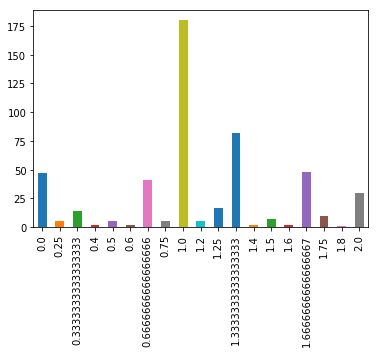

In [407]:
var_name = "opinion_about_ethnonym_recoded"
# text_distr = pd.ExcelWriter('../output/distr.xlsx')

df[["texts_id", "ethnonym_id", "assessor_id", var_name]]\
    .dropna(subset=[var_name]) \
    .groupby(["texts_id", "ethnonym_id"])\
    .agg({
        "assessor_id": lambda x: len(x.unique()),
        var_name: "mean"
    }).query("assessor_id >= 3")\
    [var_name]\
    .value_counts()\
    .sort_index()\
    .plot(kind="bar")
# text_distr.save()

# Изменение структуры данных (опрятные данные)

# Ускорение и оптимизация памяти
* [Memory Optimization](https://www.datacamp.com/community/tutorials/pandas-idiomatic#optimization)
* [Modern Pandas (Part 4): Performance](https://tomaugspurger.github.io/modern-4-performance)

В случае, если у вас есть номинальные или порядковые переменные с относительное небольшим количеством уникальных значений, следует использовать специальный тип данных [Categorical](https://pandas.pydata.org/pandas-docs/stable/categorical.html). Он кодирует эти значения таким образом, что потребление памяти может уменьшиться в разы.

In [166]:
s = df.ethnonym_id.copy()
print('{:0.2f} KB'.format(s.memory_usage(index=False) / 1024))

33.42 KB


In [167]:
c = s.astype('category')
print('{:0.2f} KB'.format(c.memory_usage(index=False) / 1024))

14.53 KB


Как вы видите, потребление памяти уменьшилось более, чем в два раза. Категориальные переменные позоволяют не только уменьшить потребление памяти, но и [ускорить вычисления](http://matthewrocklin.com/blog/work/2015/06/18/Categoricals).

Вообще, не следует хранить данные как текст (`dtype` будет равен `object`), если можно использовать специальный тип данных (например, `datetime`).

Также, стоит избегать использования циклов, которые можно сделать при помощи `iterrows()` и `iteritems()`, а использовать методы Pandas (`pivot`, `groupby` и др.)

Те, кто владеют С, могут писать расширения на этом языке, которые могут [значительно ускорить](https://pandas.pydata.org/pandas-docs/stable/enhancingperf.html) вычисления.

# Дополнительные библиотеки

* [Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)
* [Data Wrangling with Data Report (Part 1/3)](https://towardsdatascience.com/data-wrangling-with-data-report-part-1-3-1cddd562a918)

# Практическое занятие
Посчитайте сходимость кодировщиков в для каждой переменной в наборе данных об этничности при помощи пакета [fast-krippendorff](https://github.com/pln-fing-udelar/fast-krippendorff). Для этого вам надо будет создать reliability data при помощи Pandas.